<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/lezione3_knn_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [ ]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<Axes: >

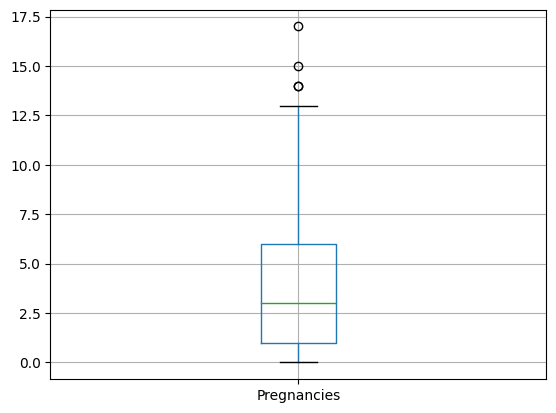

In [ ]:
df.boxplot(column='Pregnancies')

<Axes: >

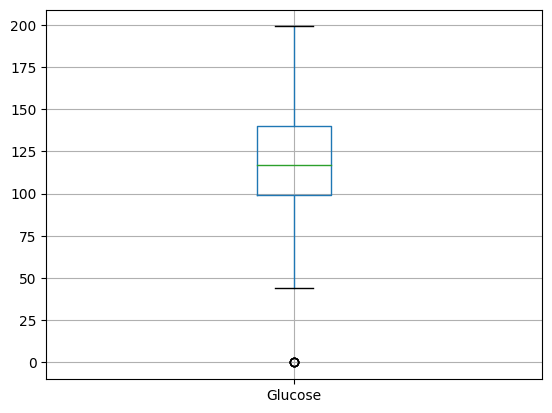

In [ ]:
df.boxplot(column='Glucose')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

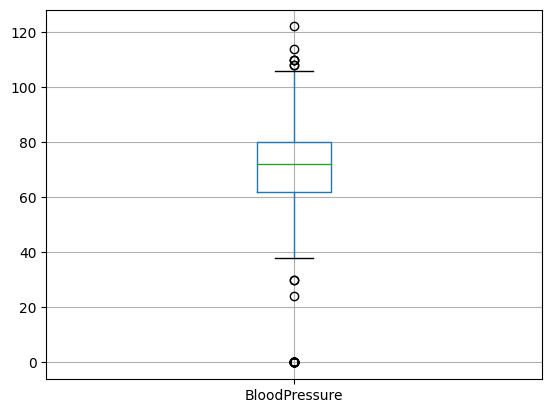

In [ ]:
df.boxplot(column='BloodPressure')

<Axes: >

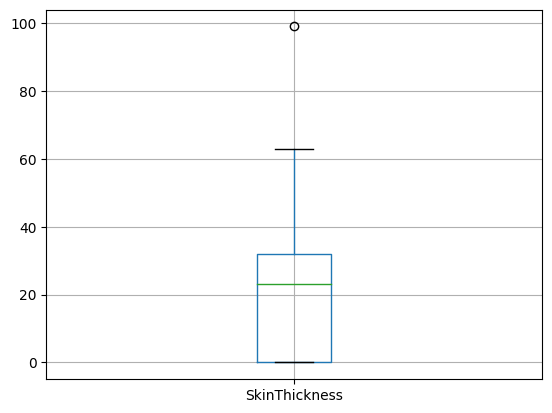

In [ ]:
df.boxplot(column='SkinThickness')

<Axes: >

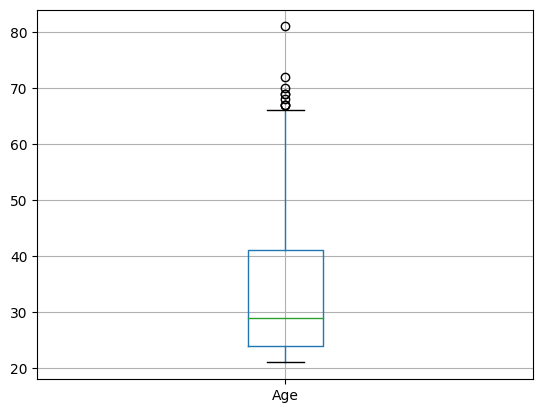

In [ ]:
df.boxplot(column='Age')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
print(X_train.shape)

(614, 8)


In [ ]:
print(X_test.shape)

(154, 8)


In [ ]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.773616,121.045603,68.869707,20.597720,80.030945,32.232410,0.460256,33.187296
std,3.324616,31.424337,19.450593,15.871612,112.612883,7.617395,0.323169,11.664943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.325000,0.238000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.400000,0.363000,29.000000
75%,6.000000,141.750000,80.000000,33.000000,127.750000,36.800000,0.600000,41.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,59.400000,2.420000,81.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
X_train_std

array([[-0.23288296, -0.19254286, -0.14765856, ...,  0.77091625,
        -0.96082409, -0.44505367],
       [-0.23288296, -0.25623969, -0.97092627, ..., -0.35899914,
         0.5132899 , -0.70244421],
       [ 0.36918077,  1.17693899,  0.77851761, ...,  0.94171741,
        -0.20208895, -0.35925682],
       ...,
       [-0.83494668, -0.38363335, -0.45638395, ..., -0.89767973,
         1.50738778, -1.04563159],
       [ 0.36918077, -0.70211751, -0.76510934, ...,  0.23223566,
         0.11998637, -0.27345998],
       [ 2.47640381, -1.17984374,  0.16106683, ..., -0.33272204,
        -0.50558301,  1.09928955]])

## KNN senza standardizzazione

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
## metriche di training
train_acc = accuracy_score(y_pred=y_train_pred,y_true= y_train)
print(train_acc)
train_prec = precision_score(y_train,y_train_pred)
print(train_prec)
train_rec = recall_score(y_train,y_train_pred)
print(train_rec)
train_f1 = f1_score(y_train,y_train_pred)
print(train_f1)

0.8697068403908795
0.8457446808510638
0.7571428571428571
0.7989949748743719


In [ ]:
## metriche di test
test_acc = accuracy_score(y_test_pred,y_test)
print(test_acc)
test_prec = precision_score(y_test_pred,y_test)
print(test_prec)
test_rec = recall_score(y_test_pred,y_test)
print(test_rec)
test_f1 = f1_score(y_test_pred,y_test)
print(test_f1)

0.7272727272727273
0.5689655172413793
0.66
0.6111111111111112


## KNN con standardizzazione

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

In [ ]:
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print(train_acc)
print(test_acc)

0.8355048859934854
0.7597402597402597


In [ ]:
train_prec = precision_score(y_train,y_train_pred)
test_prec = precision_score(y_test,y_test_pred)
print(train_prec)
print(test_prec)

0.7883597883597884
0.7058823529411765


In [ ]:
train_rec = recall_score(y_train,y_train_pred)
test_rec = recall_score(y_test,y_test_pred)
print(train_rec)
print(test_rec)

0.7095238095238096
0.6206896551724138


In [ ]:
k_values = list(range(3,20))
k_values

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
k_values = list(range(3,20))
l_prec = []
l_recall = []
l_f1 = []

for k in k_values:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train_std,y_train)
     y_pred_test = knn.predict(X_test_std)

     prec = precision_score(y_test,y_pred_test)
     rec = recall_score(y_test,y_pred_test)
     f1 = f1_score(y_test,y_pred_test)

     l_prec.append(prec)
     l_recall.append(rec)
     l_f1.append(f1)

In [ ]:
import matplotlib.pyplot as plt

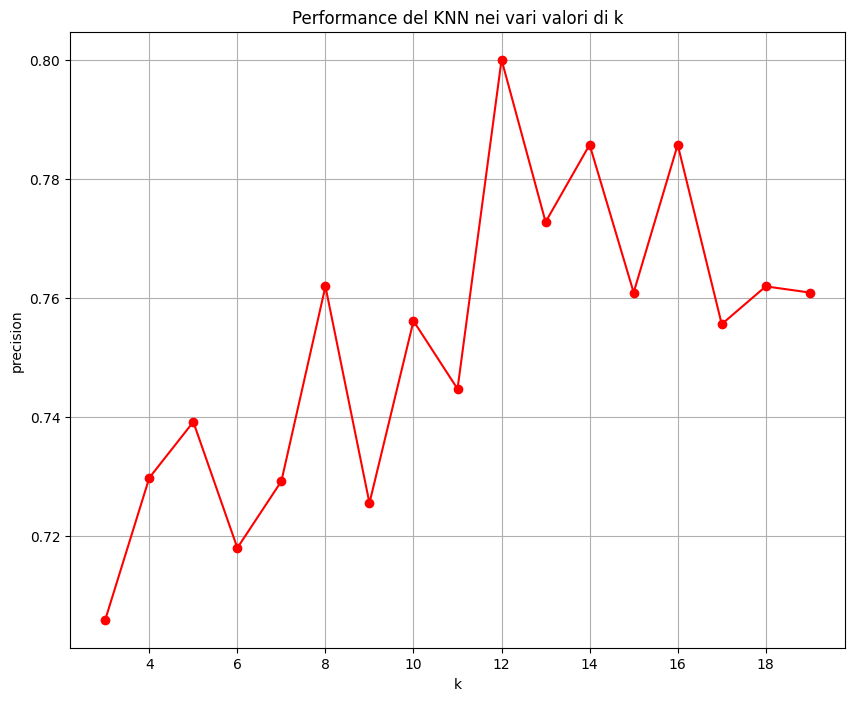

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(k_values,l_prec,marker='o',linestyle='-',color='r')
plt.title('Performance del KNN nei vari valori di k')
plt.xlabel('k')
plt.ylabel('precision')
plt.grid(True)
plt.show()

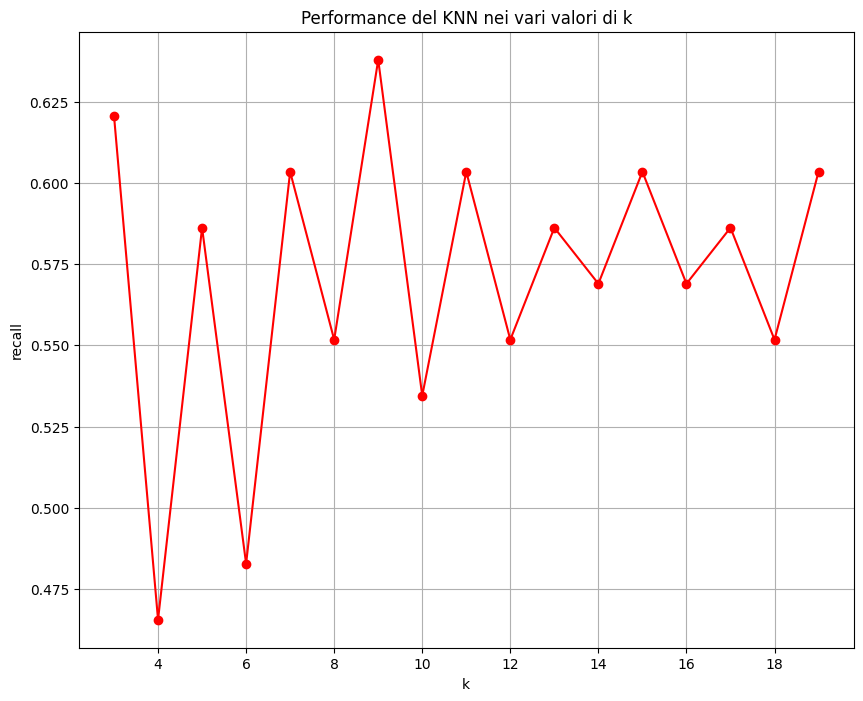

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(k_values,l_recall,marker='o',linestyle='-',color='r')
plt.title('Performance del KNN nei vari valori di k')
plt.xlabel('k')
plt.ylabel('recall')
plt.grid(True)
plt.show()

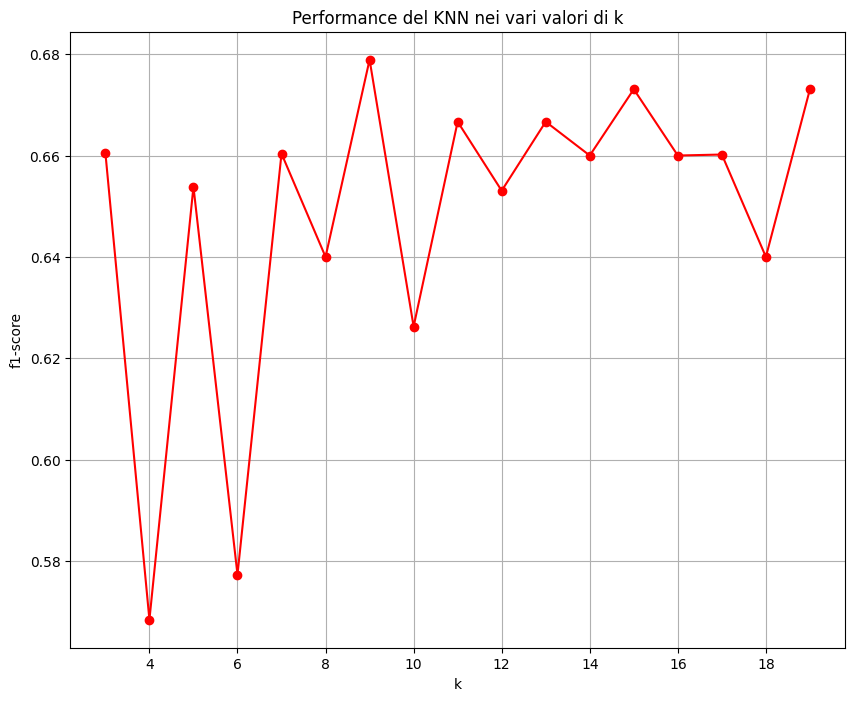

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(k_values,l_f1,marker='o',linestyle='-',color='r')
plt.title('Performance del KNN nei vari valori di k')
plt.xlabel('k')
plt.ylabel('f1-score')
plt.grid(True)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std,y_train)
y_pred_test = knn.predict(X_test_std)
y_pred_train = knn.predict(X_train_std)

train_prec = precision_score(y_train,y_pred_train)
train_rec = recall_score(y_train,y_pred_train)
train_f1 = f1_score(y_train,y_pred_train)

prec = precision_score(y_test,y_pred_test)
rec = recall_score(y_test,y_pred_test)
f1 = f1_score(y_test,y_pred_test)

In [ ]:
print(train_prec)
print(prec)

0.7368421052631579
0.7254901960784313


In [ ]:
print(train_rec)
print(rec)

0.6
0.6379310344827587


## SVM senza standardizzazione

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [ ]:
train_prec = precision_score(y_train,y_pred_train)
train_rec = recall_score(y_train,y_pred_train)
train_f1 = f1_score(y_train,y_pred_train)

In [ ]:
test_prec = precision_score(y_test,y_pred_test)
test_rec = recall_score(y_test,y_pred_test)
test_f1 = f1_score(y_test,y_pred_test)

In [ ]:
print(train_prec)
print(test_prec)

0.7267441860465116
0.7380952380952381


In [ ]:
print(train_rec)
print(test_rec)

0.5813953488372093
0.5849056603773585


In [ ]:
print(train_f1)
print(test_f1)

0.6459948320413437
0.6526315789473685


In [ ]:
param_grid = {'kernel':['linear','rbf'],'C':[0.1,0.01,1,0.001]

}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

In [ ]:
len(X_train)

491

In [ ]:
len(X_test)

154

In [ ]:
len(X_val)

123

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_val,y_val)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
grid.best_score_

0.716

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
y_pred_val = svc.predict(X_val)

In [ ]:
print(precision_score(y_train,y_pred_train))
print(precision_score(y_val,y_pred_val))
print(precision_score(y_test,y_pred_test))

0.7536231884057971
0.65625
0.6842105263157895


## SVM con standardizzazione

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20,stratify=y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_val_std = scaler.fit_transform(X_val)

In [ ]:
param_grid = {'kernel':['linear','rbf'],'C':[0.1,0.01,1,0.001]

}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_val_std,y_val)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
grid.best_score_

0.7153333333333334

In [ ]:
svc_std = SVC(kernel='linear')
svc_std.fit(X_train_std,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_train = svc_std.predict(X_train_std)
y_pred_val = svc_std.predict(X_val_std)
y_pred_test = svc_std.predict(X_test_std)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std,y_train)
y_pred_test_knn = knn.predict(X_test_std)
y_pred_train_knn = knn.predict(X_train_std)
y_pred_val_knn = knn.predict(X_val_std)

In [ ]:
print(precision_score(y_train,y_pred_train))
print(precision_score(y_val,y_pred_val))
print(precision_score(y_test,y_pred_test))

0.7913669064748201
0.6666666666666666
0.6


In [ ]:
print(precision_score(y_train,y_pred_train_knn))
print(precision_score(y_val,y_pred_val_knn))
print(precision_score(y_test,y_pred_test_knn))

0.7687074829931972
0.7666666666666667
0.5


In [ ]:
print(recall_score(y_train,y_pred_train))
print(recall_score(y_val,y_pred_val))
print(recall_score(y_test,y_pred_test))

0.6432748538011696
0.5116279069767442
0.5


In [ ]:
print(f1_score(y_train,y_pred_train))
print(f1_score(y_val,y_pred_val))
print(f1_score(y_test,y_pred_test))

0.7096774193548386
0.5789473684210527
0.5454545454545454


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_std,y_train)
y_pred_test = knn.predict(X_test_std)
y_pred_train = knn.predict(X_train_std)
y_pred_val = knn.predict(X_val_std)

train_prec = precision_score(y_train,y_pred_train)
train_rec = recall_score(y_train,y_pred_train)
train_f1 = f1_score(y_train,y_pred_train)

prec = precision_score(y_test,y_pred_test)
rec = recall_score(y_test,y_pred_test)
f1 = f1_score(y_test,y_pred_test)